<a href="https://colab.research.google.com/github/Sriharish19/Bike-Demand-Prediction/blob/main/SH_Bike_Sharing_Demand_Prediction_ML_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import math

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/My_drive')

Mounted at /content/My_drive


In [3]:
# Loading the file
df = pd.read_csv('/content/My_drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')
df1 = pd.read_csv('/content/My_drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
# dataframe shape
df.shape

(8760, 14)

In [5]:
# top 5 rows in the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# bottom 5 rows in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
# Null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Summary
df.describe([0.95,0.98,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
98%,2355.000000,23.000000,33.600000,97.000000,4.300000,2000.000000,23.900000,2.960000,2.000000,1.300000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
# Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Numerical variables
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [13]:
# Categorical variables
columns = df.columns.tolist()
numerical_variables = df.describe().columns.tolist()

categorical_variables = [var for var in columns]
for var in columns:
  if var in numerical_variables:
    categorical_variables.remove(var)
print(categorical_variables)
print(numerical_variables)

['Date', 'Seasons', 'Holiday', 'Functioning Day']
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [14]:
# Removing date column
df.drop('Date',axis = 1,inplace = True)

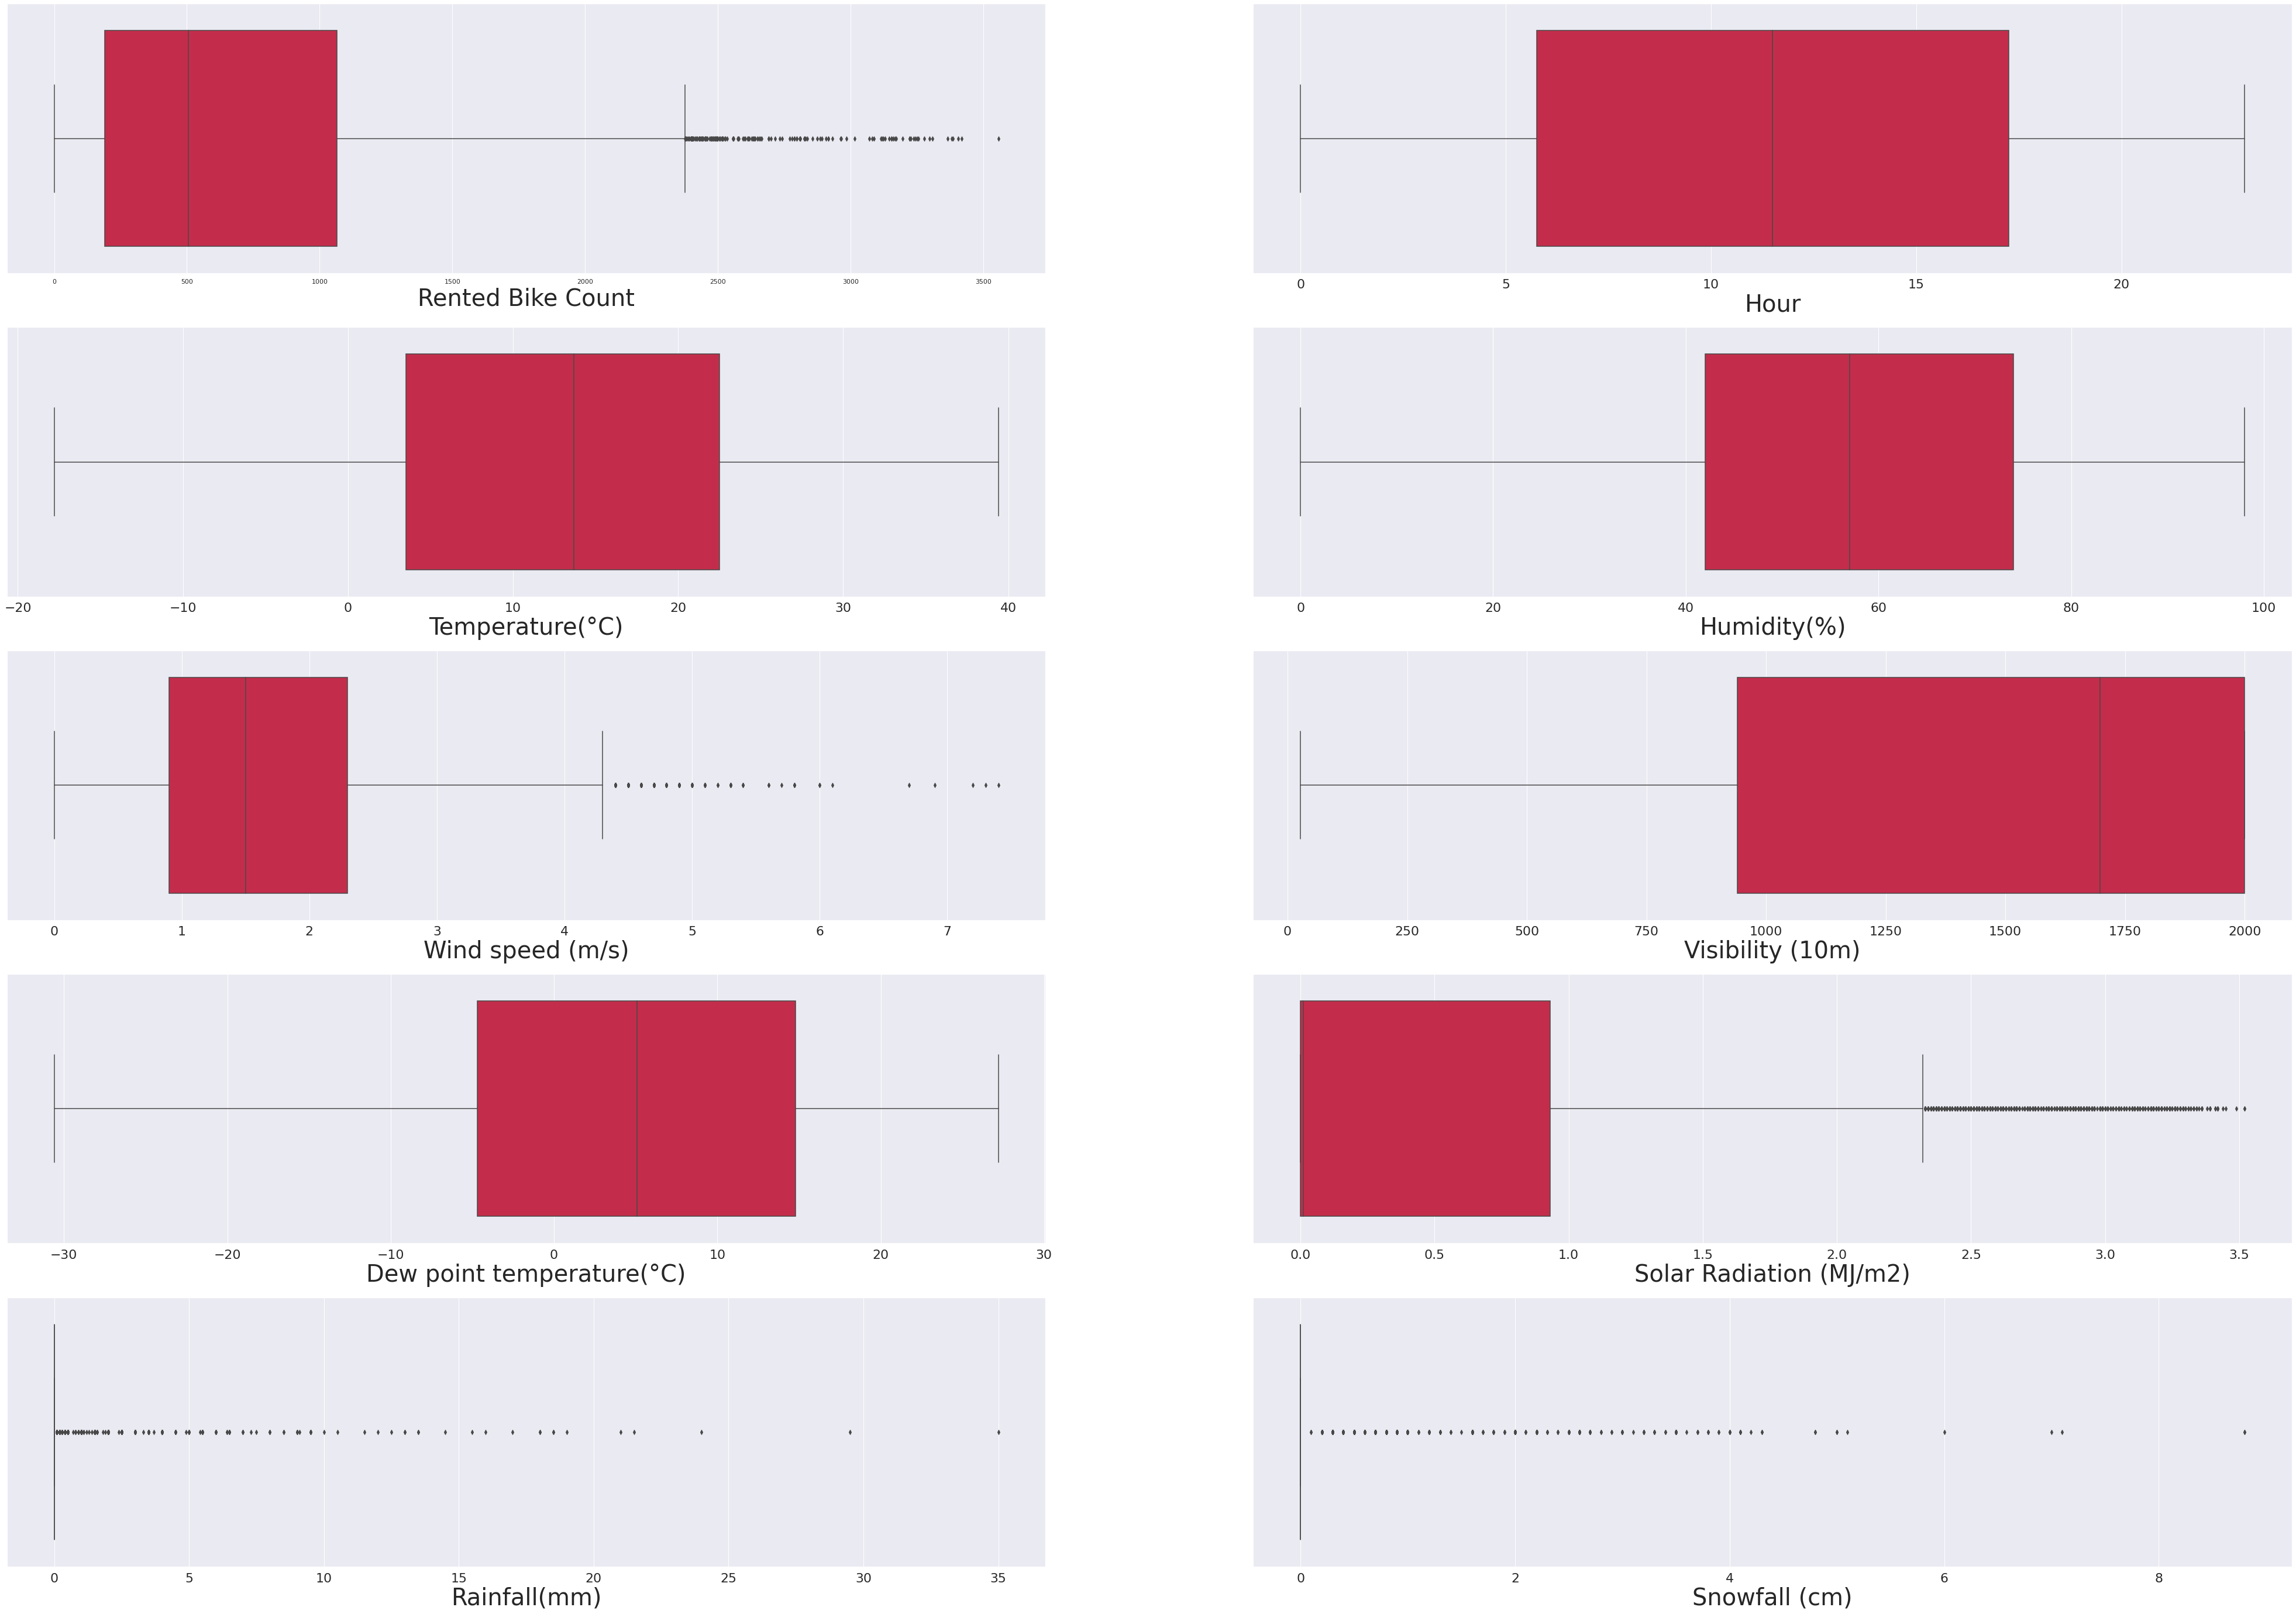

In [15]:
# Box plot to detect outliers
lst_box = numerical_variables
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='crimson')
    plt.xlabel(i[1],fontsize=40)

In [16]:
# Z Score based technique to remove outliers
lst = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

Rented Bike CountLower_limit: -1230.39
Rented Bike CountUpper_limit: 2639.59
Temperature(°C)Lower_limit: -22.95
Temperature(°C)Upper_limit: 48.72
Humidity(%)Lower_limit: -2.86
Humidity(%)Upper_limit: 119.31
Wind speed (m/s)Lower_limit: -1.38
Wind speed (m/s)Upper_limit: 4.83
Visibility (10m)Lower_limit: -388.07
Visibility (10m)Upper_limit: 3261.72
Dew point temperature(°C)Lower_limit: -35.11
Dew point temperature(°C)Upper_limit: 43.25
Solar Radiation (MJ/m2)Lower_limit: -2.04
Solar Radiation (MJ/m2)Upper_limit: 3.18


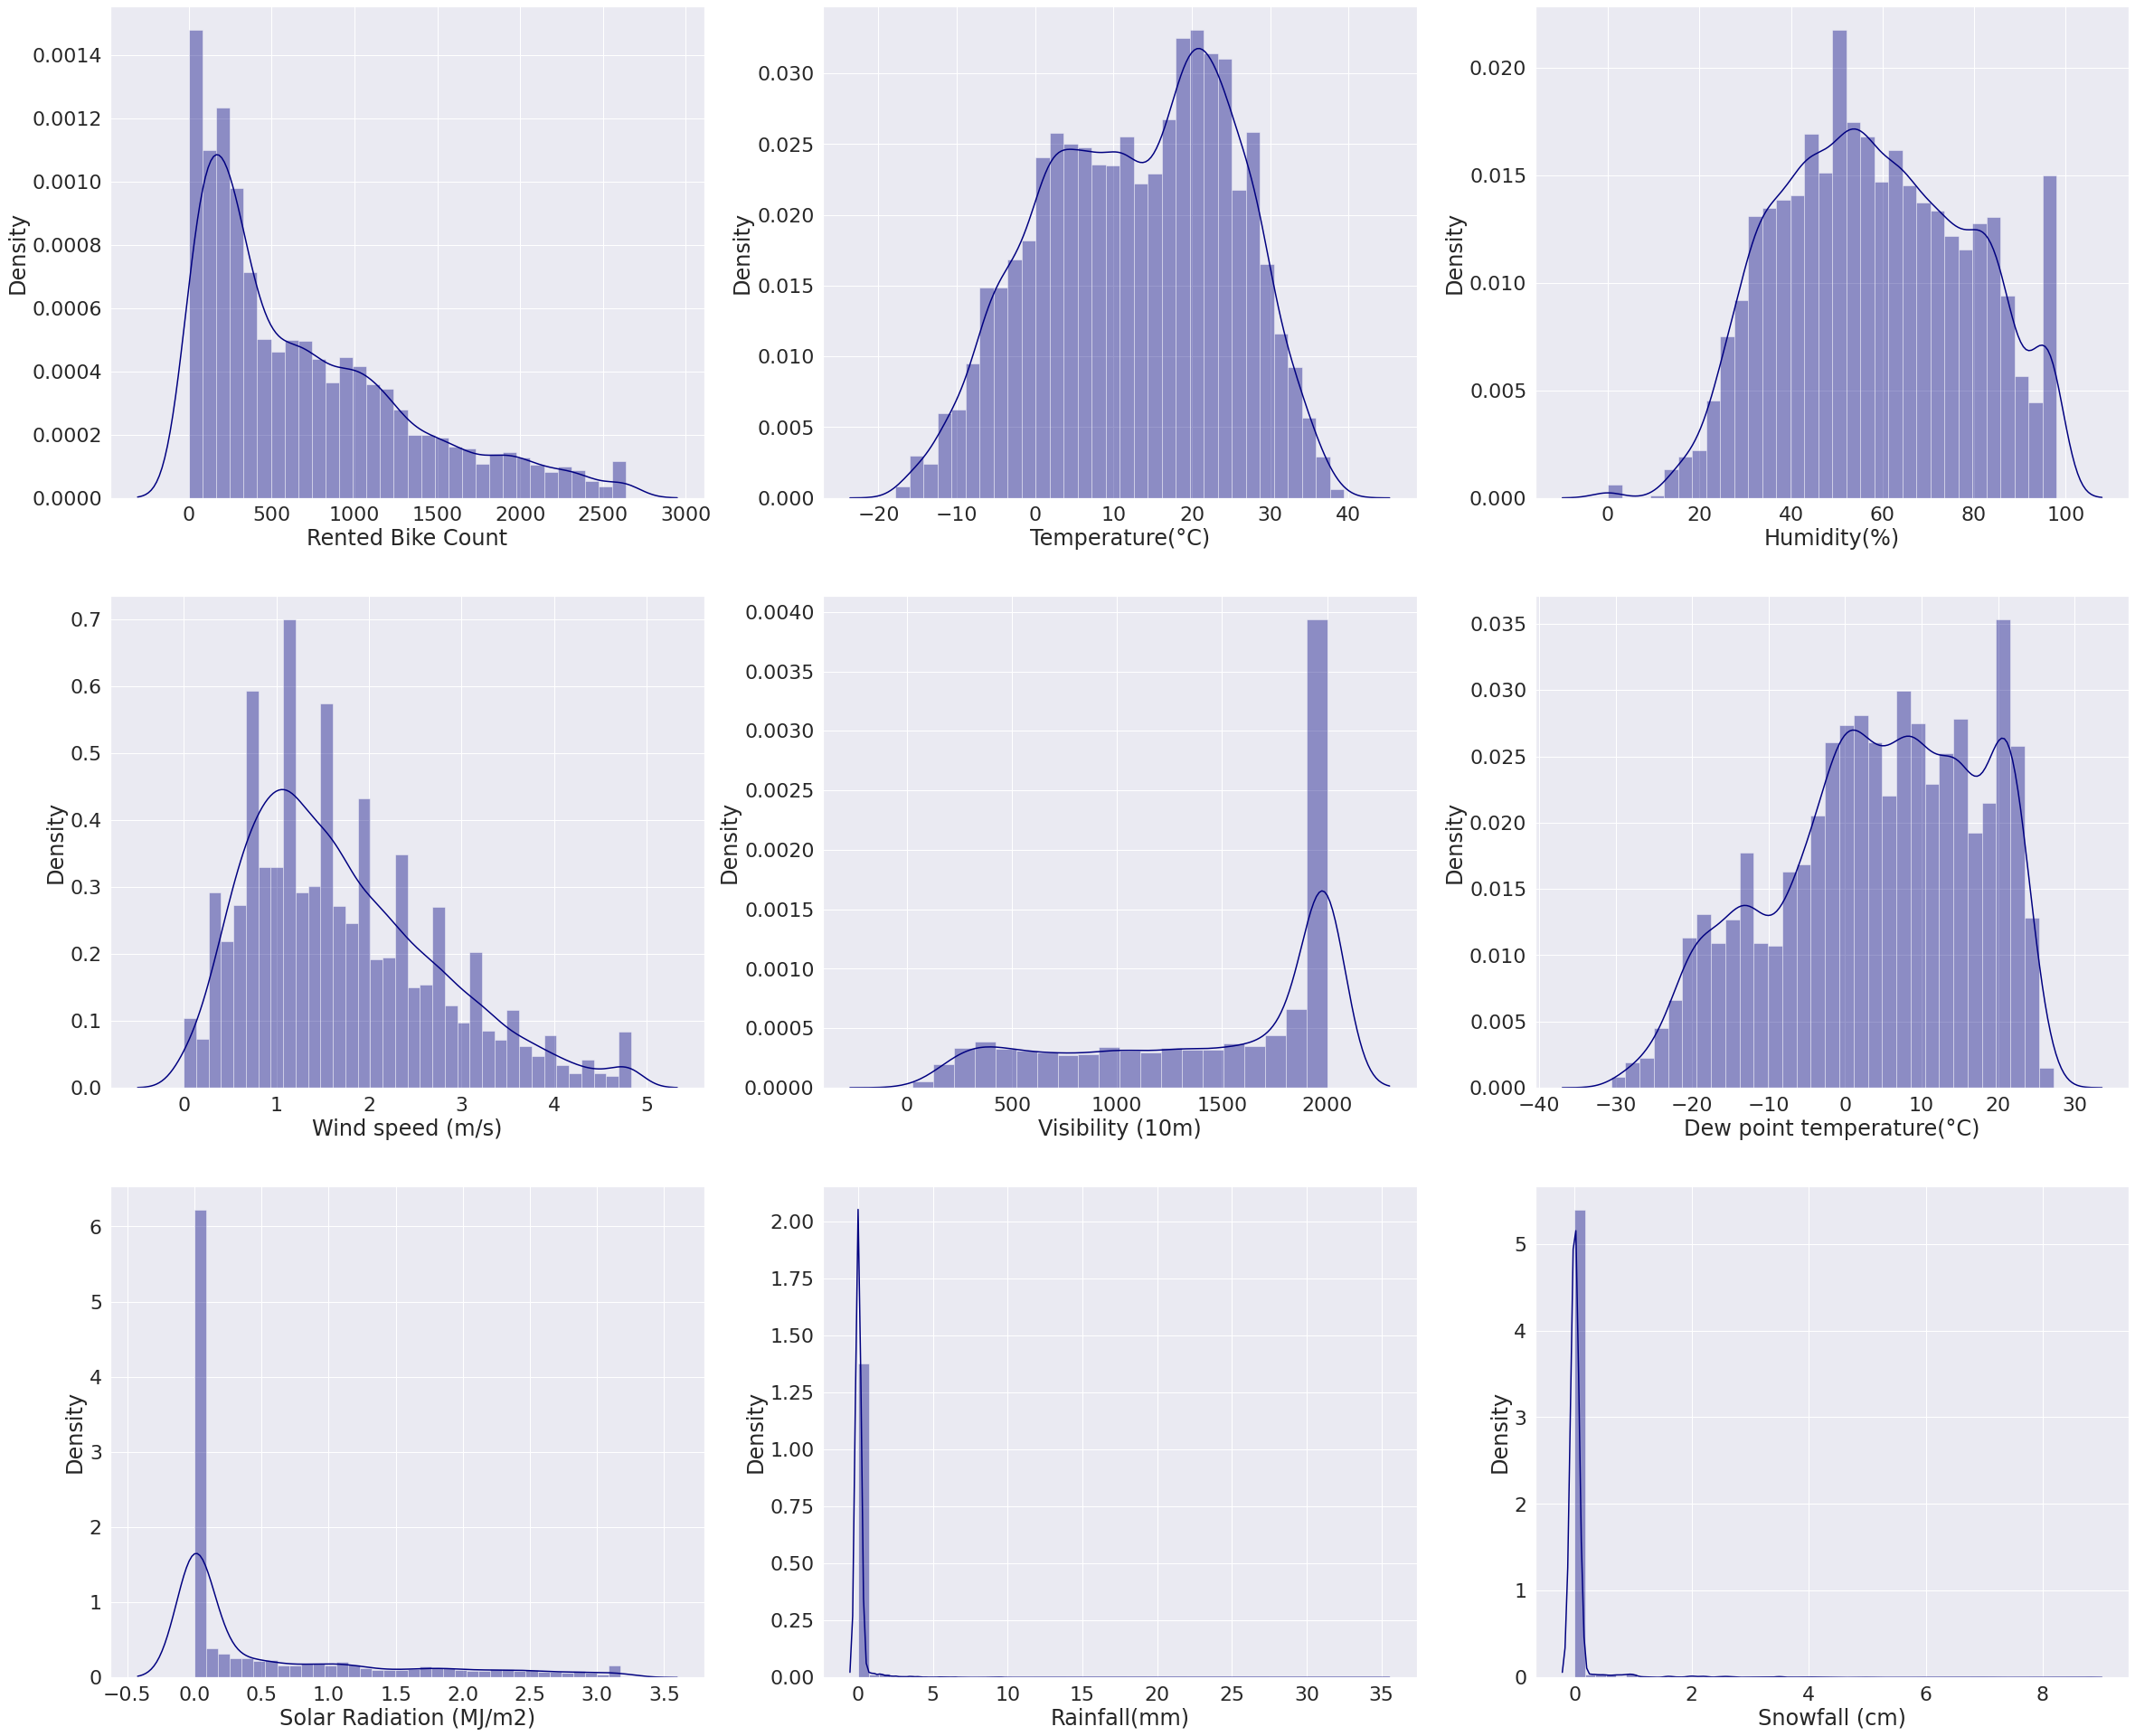

In [17]:
# Distribution plot for numerical variables
lst_dist = numerical_variables
numerical_variables.remove('Hour')
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'navy')

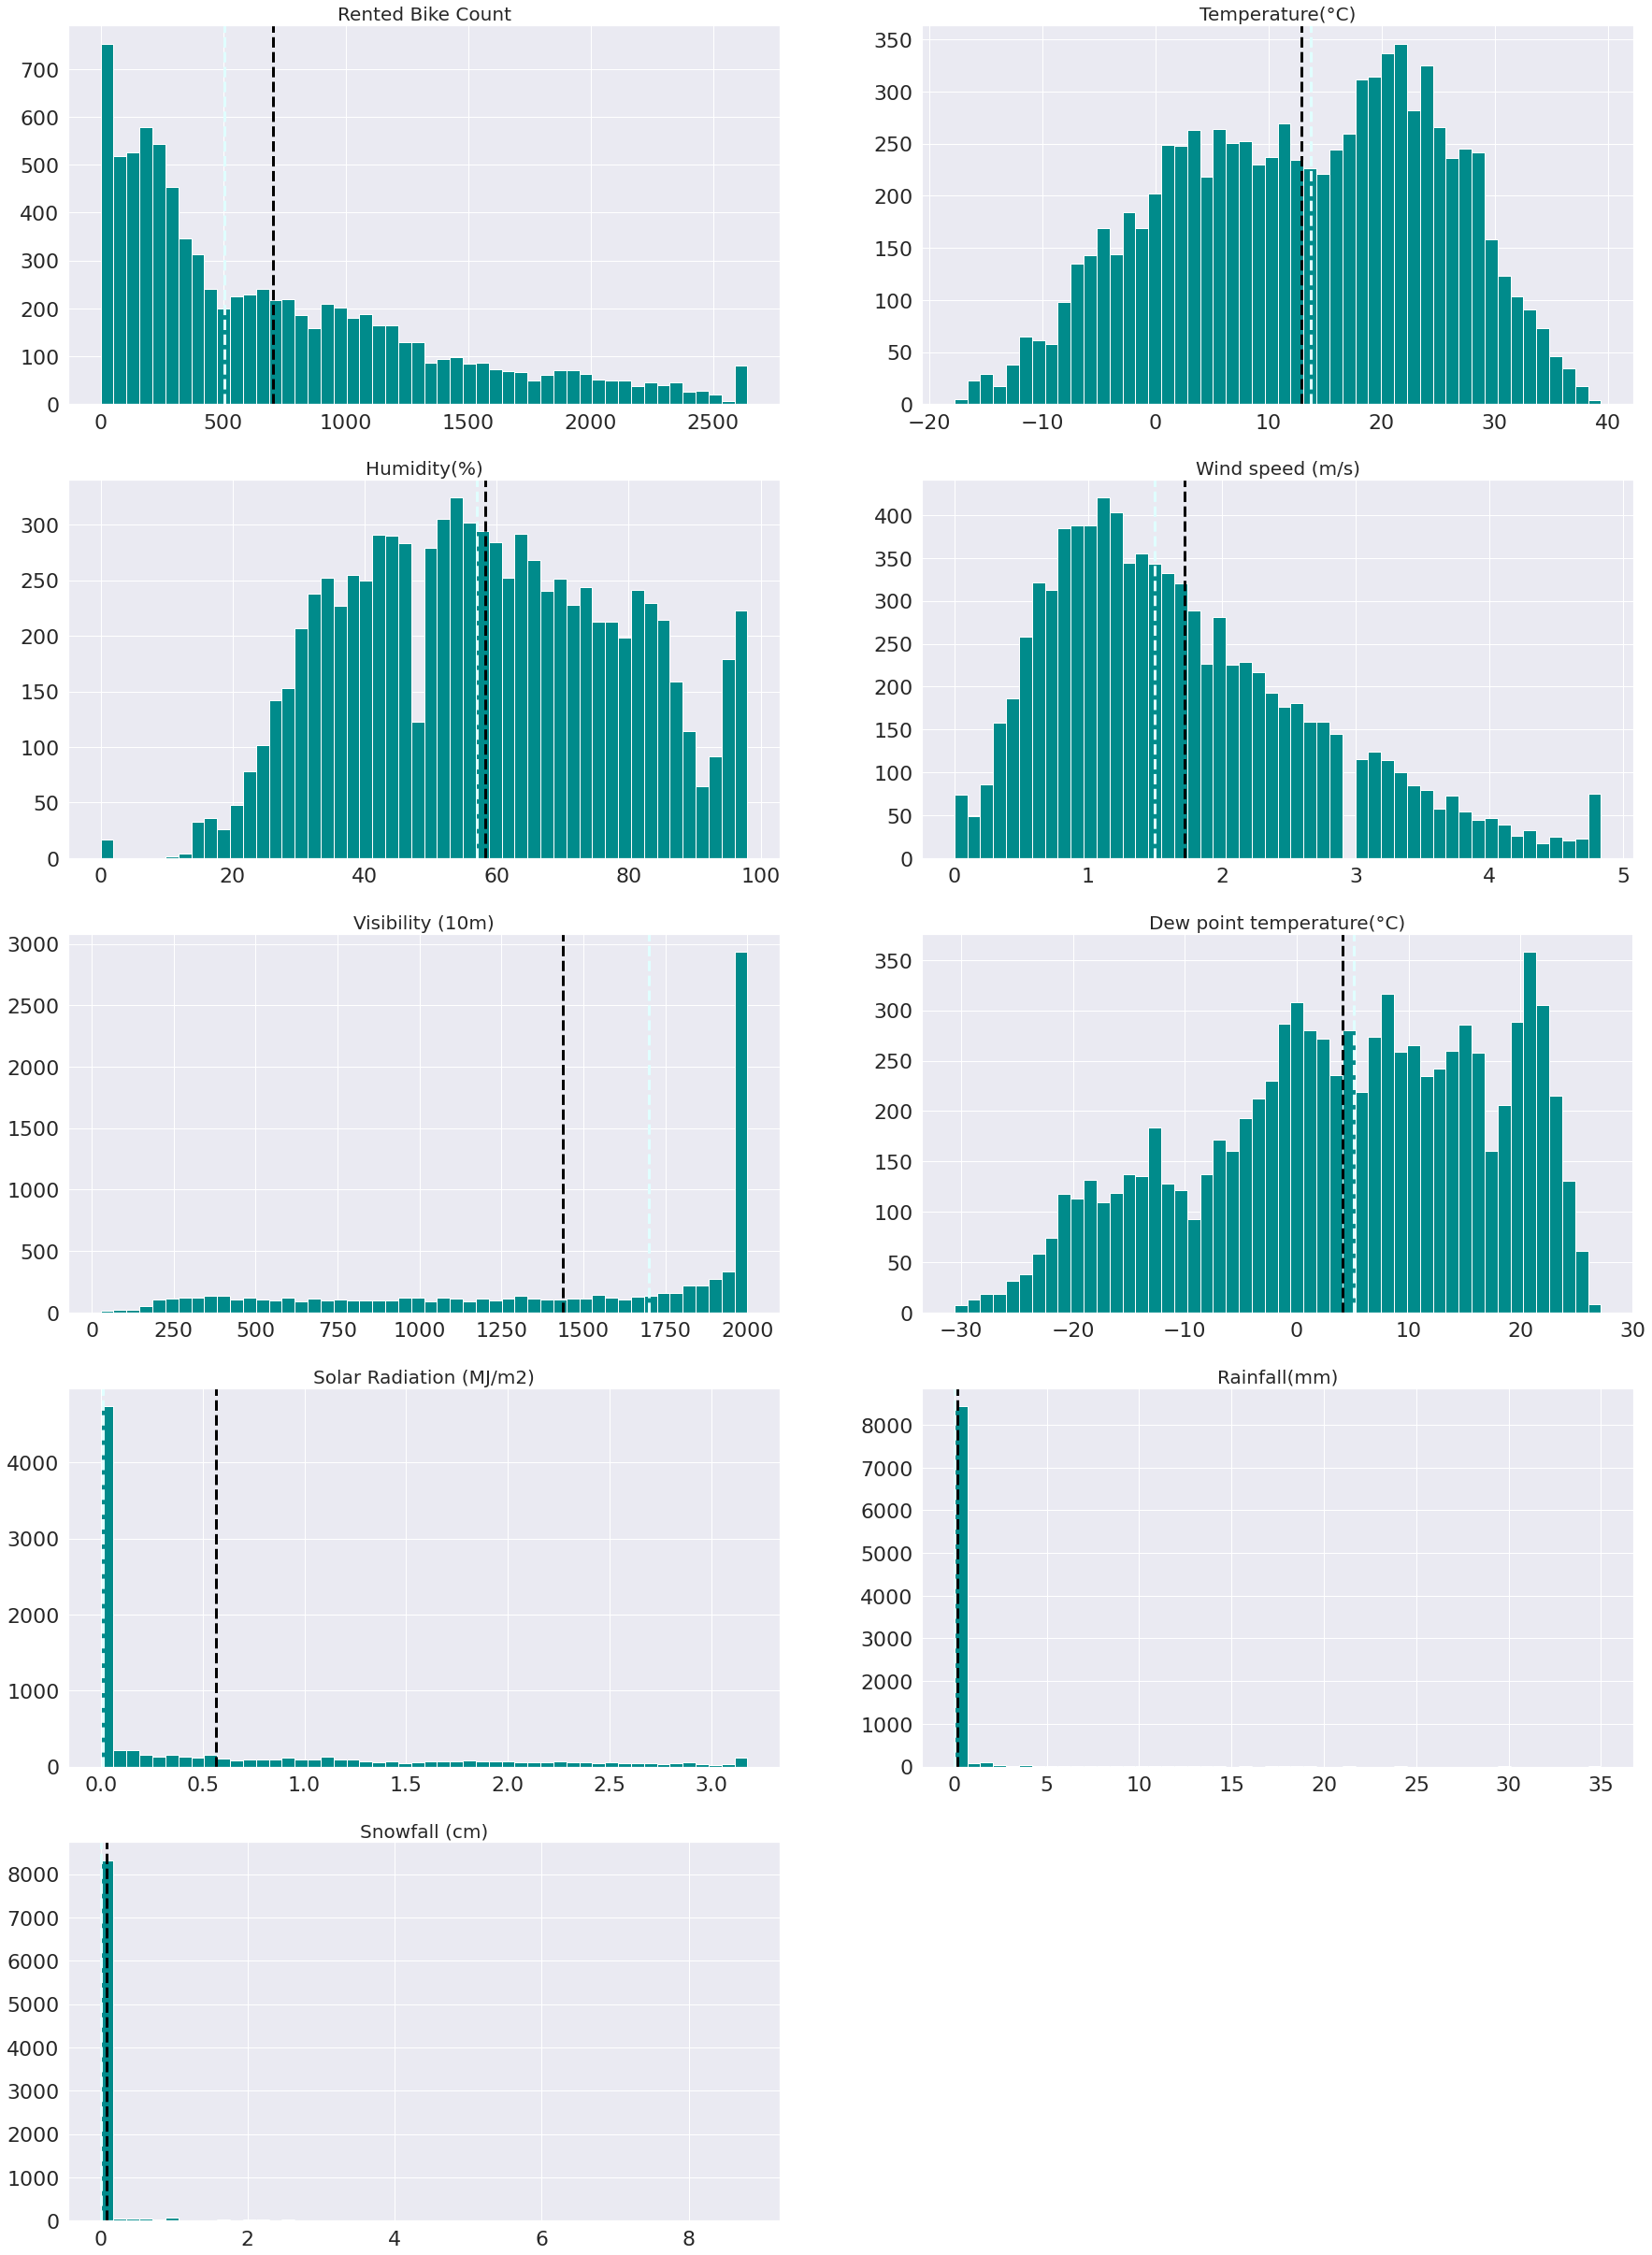

In [18]:
# Calculating mean and median

# numerical_variables.remove('Hour')
plt.figure(figsize = (30,70))

for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  feature.hist(bins=50,color = 'darkcyan')
  plt.axvline(feature.mean(),color = 'black',linestyle='dashed', linewidth=3)
  plt.axvline(feature.median(),color = 'lightcyan',linestyle='dashed',linewidth=3)
  plt.title(i[1],fontsize = 20)

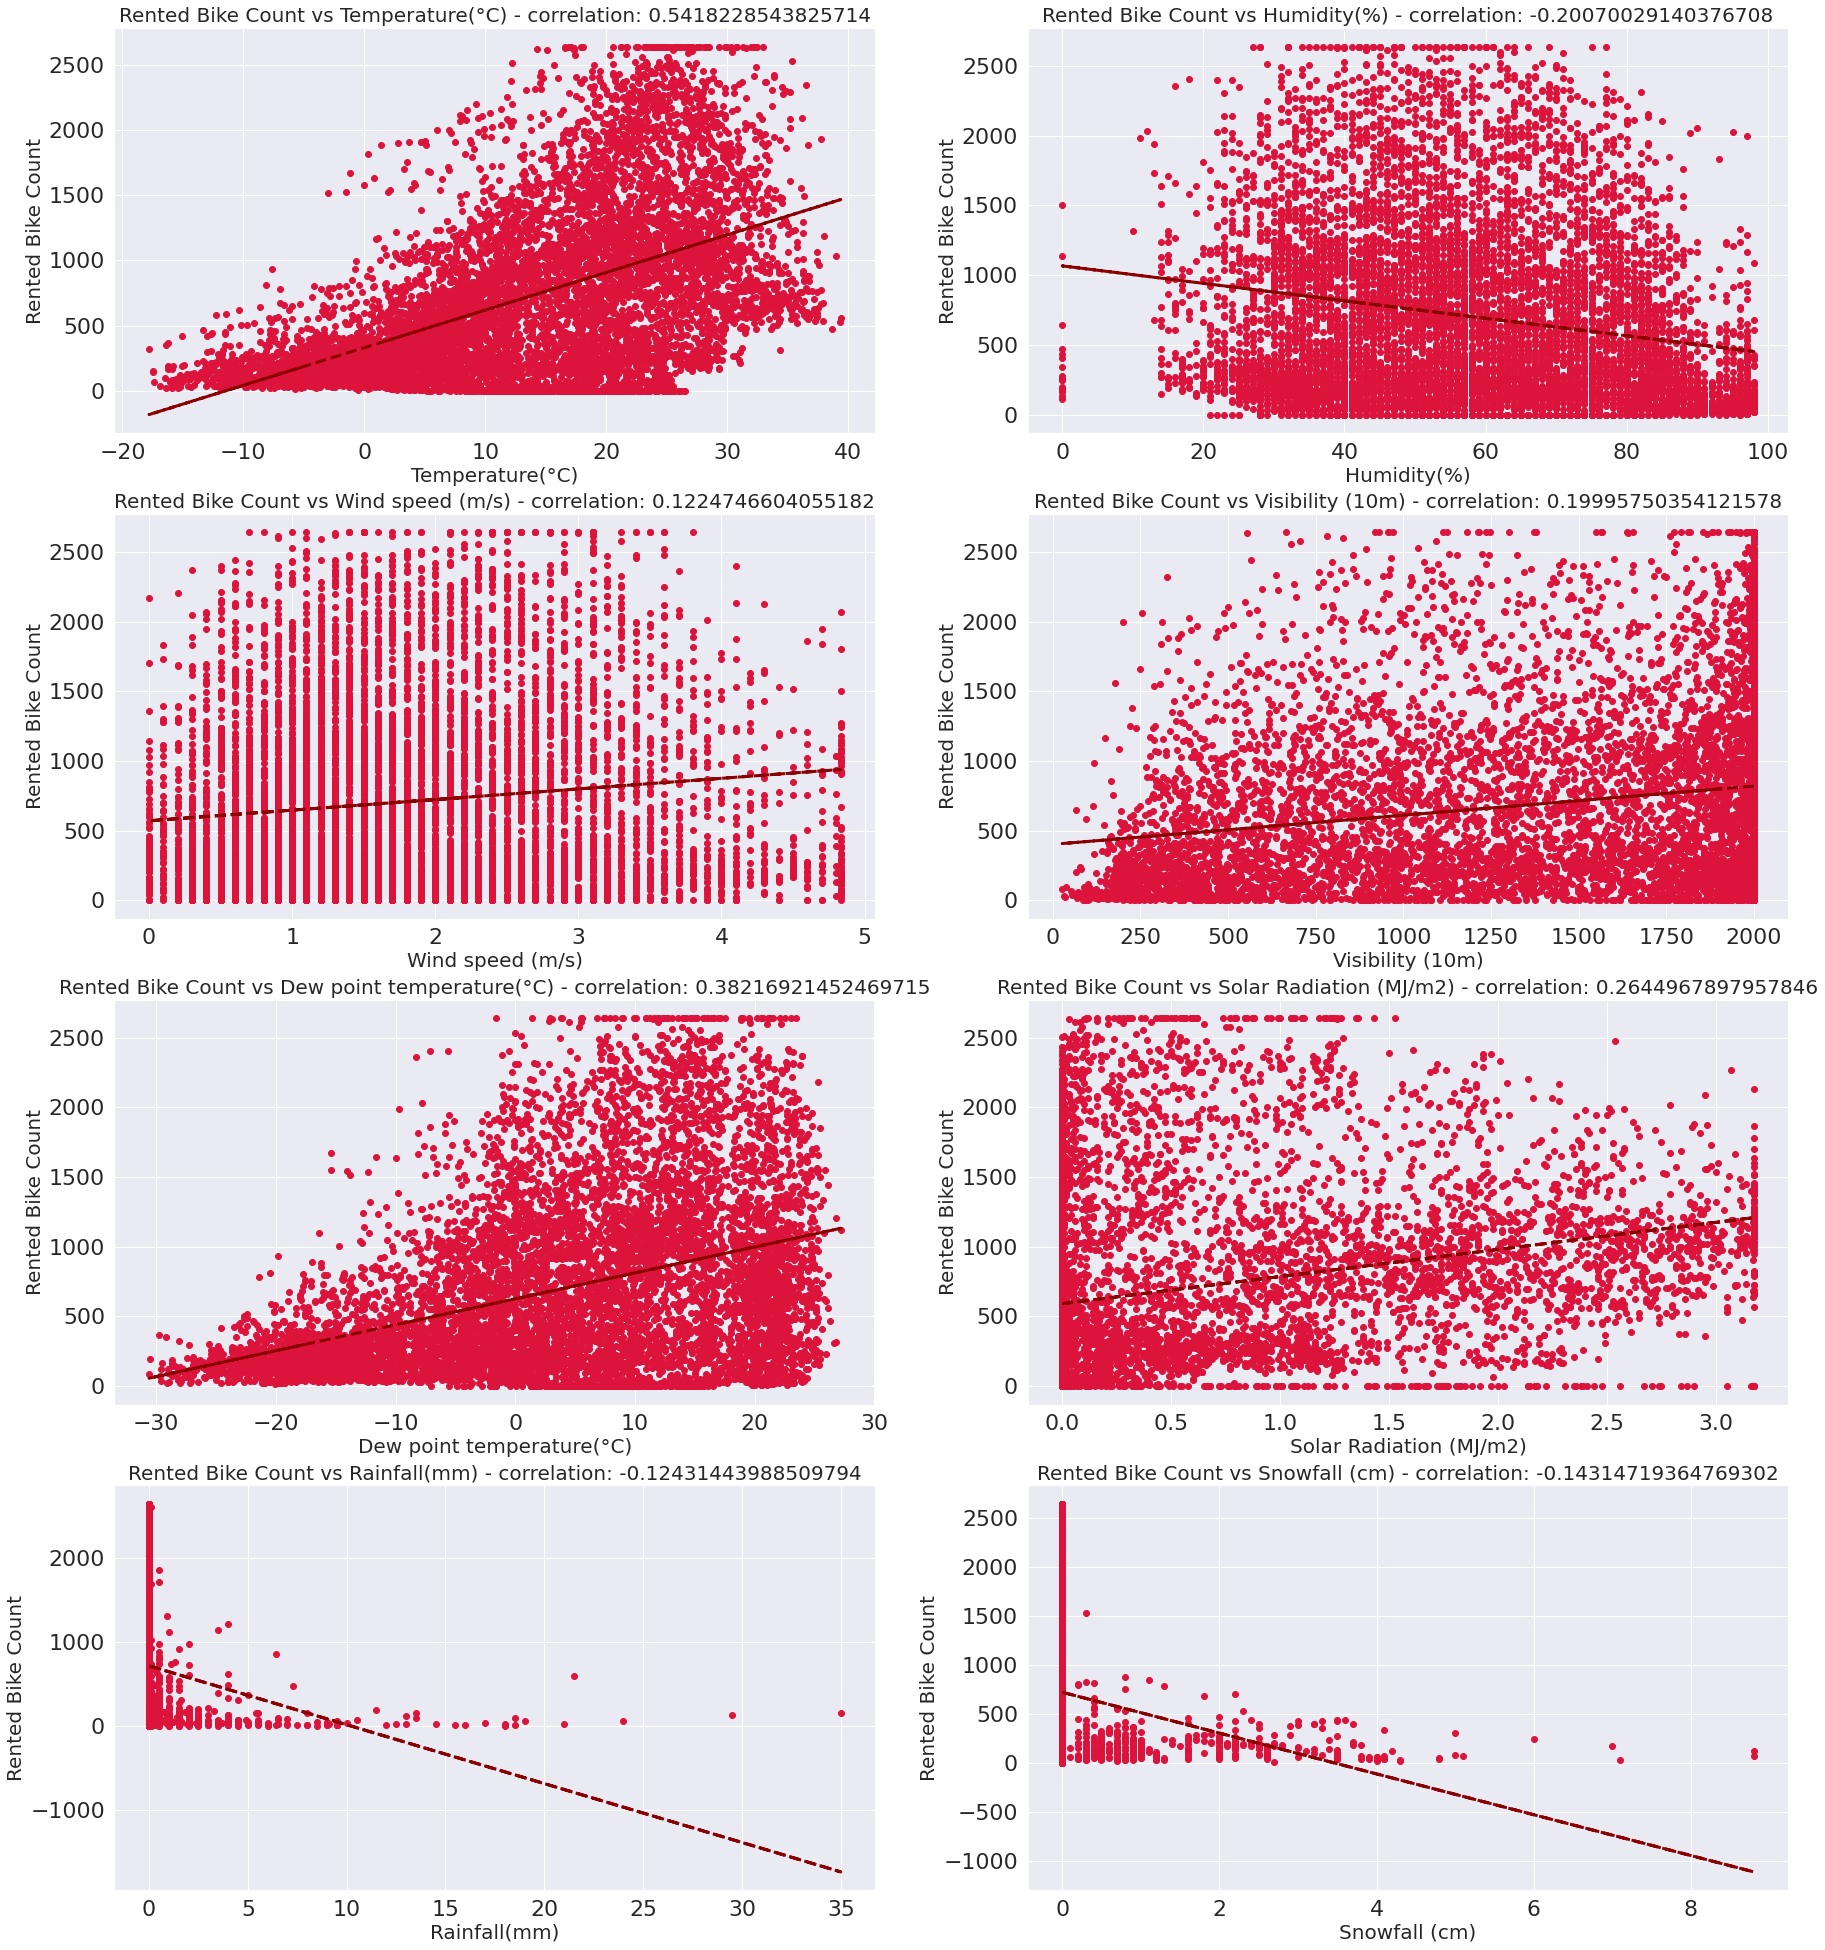

In [19]:
# Plotting scatter plot and correlation

plt.figure(figsize = (30,70))

numerical_variables.remove('Rented Bike Count')
for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color = 'crimson',alpha = 1)
  plt.xlabel(i[1],fontsize = 20)
  plt.ylabel('Rented Bike Count',fontsize = 20)
  plt.title('Rented Bike Count' + ' vs '  + i[1] + ' - correlation: ' + str(correlation),fontsize = 20)
  z = np.polyfit(df[i[1]], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i[1]])
  plt.plot(df[i[1]], y_hat, "r--", lw=3,color = 'darkred')

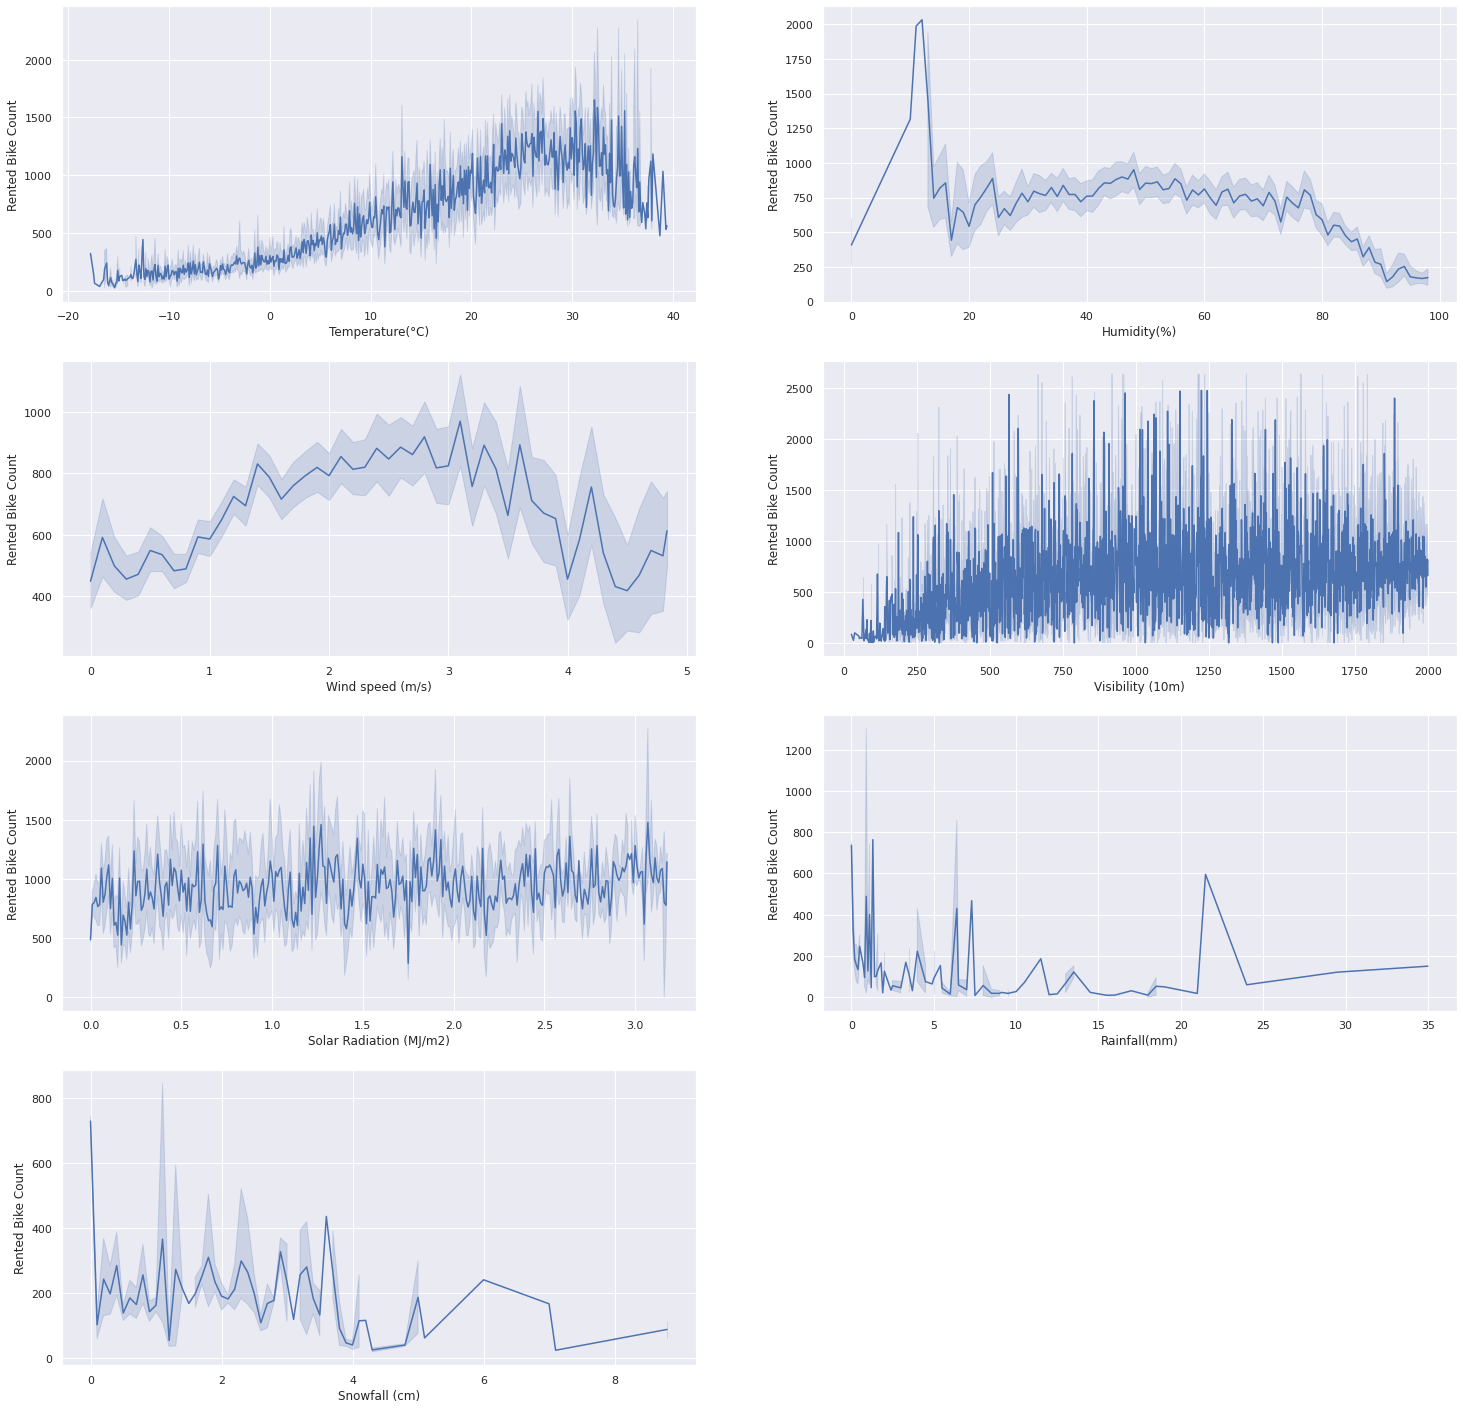

In [20]:
# line plot for numerical variables
ee = ['Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
sns.set_theme(style="darkgrid")
plt.figure(figsize = (25, 25))
for i in enumerate(ee):
  plt.subplot(4,2,i[0]+1)
  sns.lineplot(x=df[i[1]],y='Rented Bike Count',data=df,palette='Grouped')

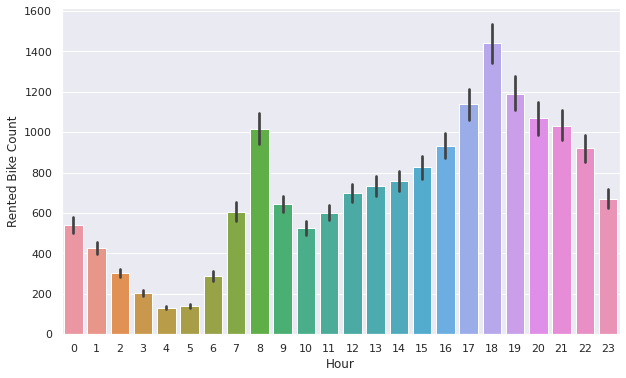

In [21]:
# Bar graph for hourly bike count
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

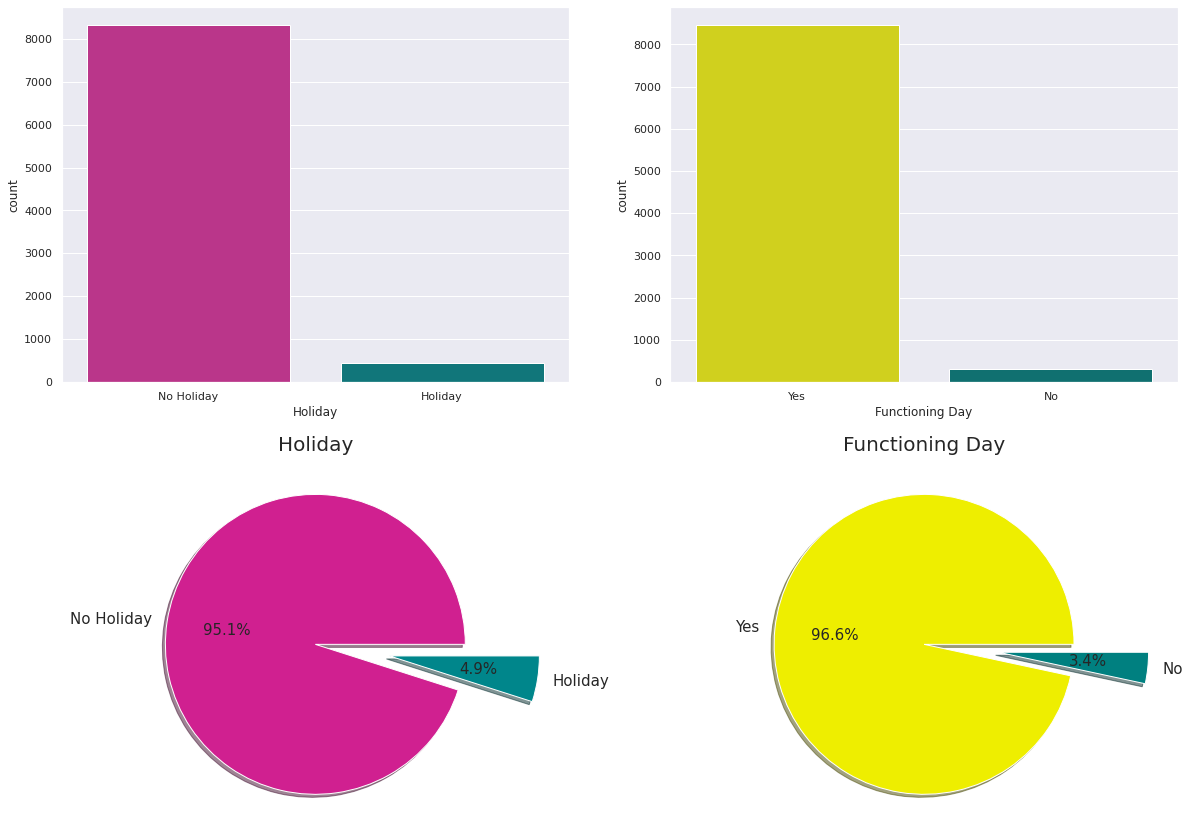

In [22]:
# Count Plot & pie chart for Holiday and functioning day
categorical_var_count = ['Holiday', 'Functioning Day','Holiday', 'Functioning Day']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#D02090','#00868B'],['#EEEE00','#008080'],['#D02090','#00868B'],['#EEEE00','#008080']]
for i in enumerate(categorical_var_count):
  if i[0]<=1 :
    plt.subplot(5, 2,i[0]+1)
    sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])
  else:
    plt.subplot(5, 2,i[0]+1)
    valuesh= df[i[1]].value_counts().tolist()
    labelh = df[i[1]].value_counts().index.tolist()
    plt.pie(valuesh ,labels=labelh , radius=1,explode = [0,0.5],colors=color[i[0]] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
    plt.rcParams['figure.figsize']=(9,8)
    plt.title(i[1],fontsize = 20)


In [23]:
#Convert the Date column in Datetime Dtype

df1['Date']=pd.to_datetime(df1['Date'],format='%d/%m/%Y')

#Breaking Down the Date into 3 Components
df1['Day']=df1['Date'].dt.day_name()
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year


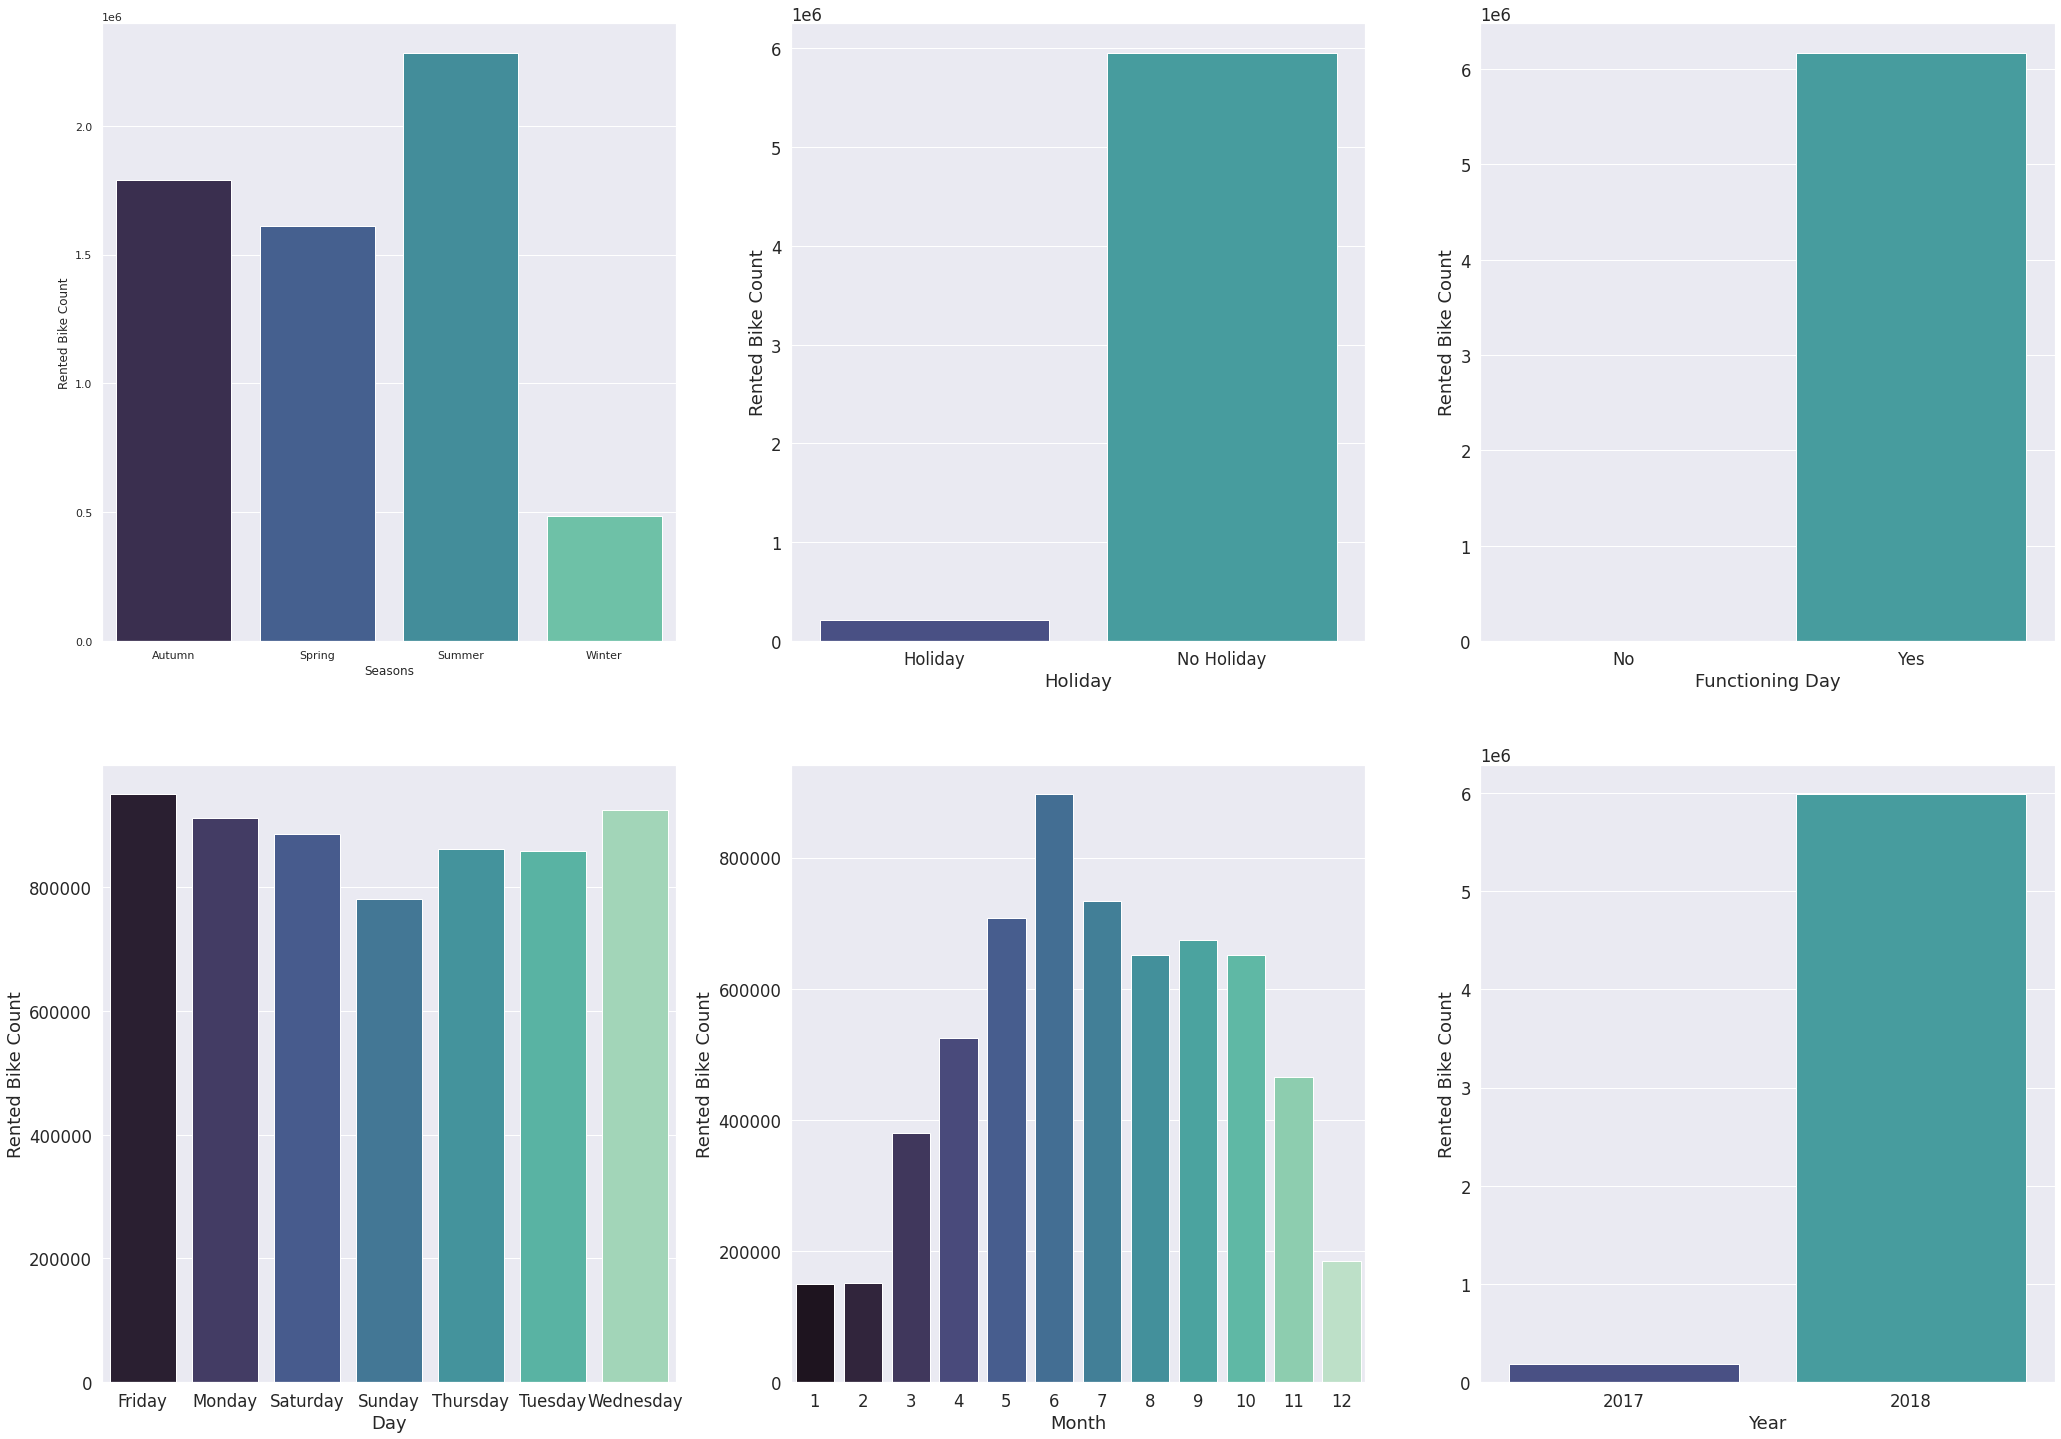

In [24]:
# Rented Bike Counts
seasons = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Seasons']).sum()).reset_index()
holiday = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Holiday']).sum()).reset_index()
Functioning_Day = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Functioning Day']).sum()).reset_index()
Day = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Day']).sum()).reset_index()
Month = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Month']).sum()).reset_index()
Year = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Year']).sum()).reset_index()
lst_dp = [seasons,holiday,Functioning_Day,Day,Month,Year]
lst_ft = ['Seasons','Holiday','Functioning Day','Day','Month','Year']

plt.figure(figsize = (35, 25))

for i in enumerate(lst_dp):
    plt.subplot(2,3,i[0]+1)
    sns.set(font_scale = 1.5)
    sns.barplot(x = lst_ft[i[0]],y ='Rented Bike Count',data = lst_dp[i[0]],palette='mako')

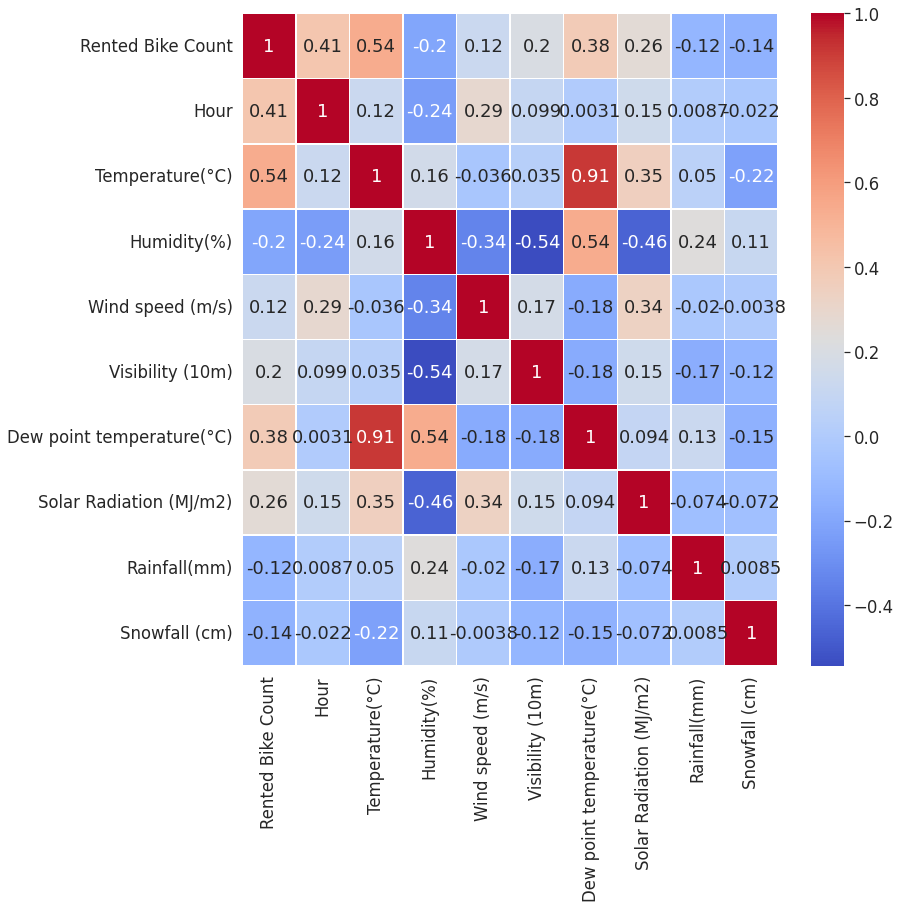

In [25]:
# Multicolinearity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5 , ax=ax,cmap="coolwarm")
plt.show()

In [157]:
# There exists a high multicollinearity between Temperature and Dew point Temperature
# Lets create a feature new feature Temperature which comprises the addition of temperature and dew point temperature

#df['Temperature'] = df['Temperature(°C)'] + df['Dew point temperature(°C)']
#df.drop('Temperature(°C)',axis = 1,inplace = True)
df3=df1.drop(['Date','Dew point temperature(°C)'],axis = 1)

In [27]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,4.421829
1,Temperature(°C),33.431756
2,Humidity(%),5.390747
3,Wind speed (m/s),4.903021
4,Visibility (10m),9.089457
5,Dew point temperature(°C),17.156495
6,Solar Radiation (MJ/m2),2.892990
7,Rainfall(mm),1.081562
8,Snowfall (cm),1.120838


Text(0.5, 1.0, 'Square root')

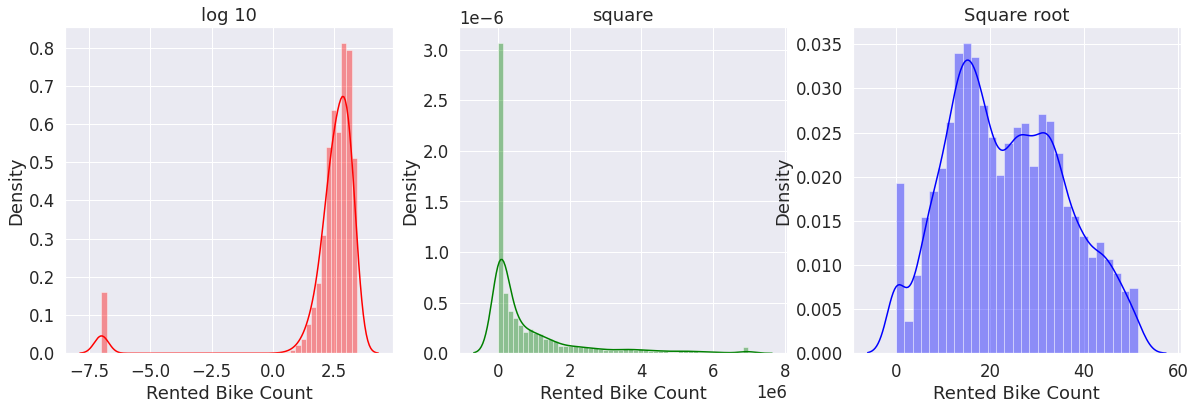

In [28]:
# Normalising dependant variable 
fig,axes = plt.subplots(1,3,figsize=(20,6))
sns.set_style("whitegrid")
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='green').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")

In [177]:
# Binning hours column
df3['morning_hours']=df['Hour'].apply(lambda x: 1 if x>=0 and x<8 else 0)
df3['afternoon_hours']=df['Hour'].apply(lambda x: 1 if x>=8 and x<16 else 0)
df3['evening_hours']=df['Hour'].apply(lambda x: 1 if x>=16 and x<24 else 0)

# Binning of highly imbalanced features

#df3['nVisibility']=df['Visibility (10m)'].apply(lambda x: 1 if x>=1650 else 0)
#df3['nRainfall']=df['Rainfall(mm)'].apply(lambda x:1 if x<2 else 0)
#df3['nSnowfall']=df['Snowfall (cm)'].apply(lambda x:1 if x<=1 else 0)
#df3['nSolar_Radiation']=df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x<=0.2 else 0)


In [178]:
# One hot encoding
data = pd.get_dummies(df3,columns = ['Hour','Seasons','Holiday','Functioning Day','Day'])
data.drop(['Hour_0','Seasons_Autumn','Holiday_Holiday','Functioning Day_No','Day_Sunday',
           'morning_hours'],axis = 1,inplace = True)
data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,...,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Day_Friday,Day_Monday,Day_Saturday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0


In [179]:
# Columns
data.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year', 'afternoon_hours',
       'evening_hours', 'nVisibility', 'nRainfall', 'nSnowfall',
       'nSolar_Radiation', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [180]:
independent_variables = data.columns.tolist()
independent_variables.remove('Rented Bike Count')
# independent_variables.remove('Date')

dependent_variable = ['Rented Bike Count']
print(independent_variables)
print(dependent_variable)

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year', 'afternoon_hours', 'evening_hours', 'nVisibility', 'nRainfall', 'nSnowfall', 'nSolar_Radiation', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']
['Rented Bike Count']


In [181]:
X = data[independent_variables].values
y =np.sqrt(df['Rented Bike Count'])

In [182]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 49)
(2190, 49)
(6570,)
(2190,)


In [183]:
#Creating function with parameters-model,independent variable dataframe and dependent variable dataframe
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)

    print(f'Train R^2 score is {model.score(X_train,y_train)}')
    print(f'Train Adj R^2 is {1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}')
    print(f'Train RMSE is: {mean_squared_error(y_train,y_pred_train,squared=False)}')
    print(' ')    
    print(f'Test R^2 is {model.score(X_test,y_test)}')
    print(f'Test Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'Test RMSE is: {mean_squared_error(y_test,y_pred_test,squared=False)}')

In [184]:
predict(LinearRegression(),X,y)

Train R^2 score is 0.7680843266974722
Train Adj R^2 is 0.7663414021588488
Train RMSE is: 5.969624317842033
 
Test R^2 is 0.7682419713065956
Test Adj R^2 is 0.7629353622383821
Test RMSE is: 5.951739093059926


In [185]:
predict(Ridge(),X,y)

Train R^2 score is 0.7680855749661861
Train Adj R^2 is 0.7663426598087234
Train RMSE is: 5.969608252292882
 
Test R^2 is 0.7682298526232485
Test Adj R^2 is 0.762922966071164
Test RMSE is: 5.951894699963766


In [186]:
predict(Lasso(),X,y)

Train R^2 score is 0.6656522693904721
Train Adj R^2 is 0.6631395333782225
Train RMSE is: 7.167721798808795
 
Test R^2 is 0.6583662293682817
Test Adj R^2 is 0.6505437738725087
Test RMSE is: 7.226148593100232


In [187]:
predict(DecisionTreeRegressor(),X,y)

Train R^2 score is 1.0
Train Adj R^2 is 1.0
Train RMSE is: 1.1157451977586e-15
 
Test R^2 is 0.84006919759417
Test Adj R^2 is 0.8364072306231953
Test RMSE is: 4.944160365179924


In [188]:
predict(RandomForestRegressor(),X,y)

Train R^2 score is 0.9876411580193675
Train Adj R^2 is 0.9875482771517217
Train RMSE is: 1.378068610468625
 
Test R^2 is 0.9046108818713801
Test Adj R^2 is 0.9024267385123602
Test RMSE is: 3.8183515218517625


In [189]:
predict(GradientBoostingRegressor(),X,y)

Train R^2 score is 0.8860757407183575
Train Adj R^2 is 0.8852195614691549
Train RMSE is: 4.183984409457517
 
Test R^2 is 0.8692640371502752
Test Adj R^2 is 0.8662705501504451
Test RMSE is: 4.470169855206606


In [190]:
predict(KNeighborsRegressor(),X,y)

Train R^2 score is 0.8594283331288448
Train Adj R^2 is 0.8583718896201505
Train RMSE is: 4.6476225276581
 
Test R^2 is 0.7857422087642629
Test Adj R^2 is 0.7808363060677437
Test RMSE is: 5.7226186042507825


In [191]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_poly_predicted = poly_model.predict(X_train_poly)
y_test_poly_predict = poly_model.predict(poly_features.fit_transform(X_test))

In [192]:
print('Train r2_score:',r2_score(y_train,y_train_poly_predicted)*100)
print('Test r2_score:',r2_score(y_test, y_test_poly_predict)*100)
print("Adjusted r2_score : ",(1-(1-r2_score(y_test, y_test_poly_predict))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_poly_predict))

Train r2_score: 93.95668320646168
Test r2_score: 84.20369949149948
Adjusted r2_score :  83.84200849854784
Mean Squared Error: 24.676388499515383


In [193]:
# Hyperparameter tuned gb
predict(GradientBoostingRegressor(n_estimators=400,max_depth=15, min_samples_leaf=30,
                          min_samples_split=500),X,y)

Train R^2 score is 0.9762463834103813
Train Adj R^2 is 0.9760678669666862
Train RMSE is: 1.910499031631751
 
Test R^2 is 0.9409714242394717
Test Adj R^2 is 0.9396198353552353
Test RMSE is: 3.0037075282111805


In [175]:
# Hyperparameter tuned rf
predict(RandomForestRegressor(n_estimators=100, criterion="squared_error",
                              max_depth=25, min_samples_split=30, 
                              min_samples_leaf=1),X,y)

Train R^2 score is 0.9271918111584341
Train Adj R^2 is 0.9266896087522614
Train RMSE is: 3.3448147114245947
 
Test R^2 is 0.8734791862230448
Test Adj R^2 is 0.8708236654114949
Test RMSE is: 4.397516513397061
